# ANN only
## If you already have input data and want to train an ANN model only, you may follow this example.

### 1. Prepare input data
For example: `x_data.txt` and `y_data.txt`.

### 2. Prepare `train.json` file
This file is used to control the training.

For example:
```
{
    "Nodes_per_layer": [
        80,
        80,
        80,
        80
    ],
    "Number_of_fold": 5,
    "feature_file": "x_data.txt",
    "label_file": "y_data.txt",
    "Activation_function": "elu",
    "Output_activation": "elu",
    "Number_of_out_node": 1,
    "Optimizer": "adam",
    "Cost_function": "mae",
    "Metrics": [
        "mean_absolute_error",
        "mean_absolute_percentage_error"
    ],
    "Batch_size": 16,
    "Epochs": 1000,
    "Verbose": 0,
    "Regularization": true,
    "Model_save_path": "./checkpoint/cp.ckpt",
    "Log_save_path": "./checkpoint/log",
    "Prediction_save_path": "./checkpoint/pred",
    "SEED": 666
}
```

### 3. Imoport `CV_ML_RUN` object

In [2]:
from elasticnet import CV_ML_RUN

### 4. Start training

In [4]:
CV_ML_RUN('train.json')

Parent process 47920.
[<Process name='Process-1' pid=25264 parent=47920 started>, <Process name='Process-2' pid=44420 parent=47920 started>, <Process name='Process-3' pid=15788 parent=47920 started>, <Process name='Process-4' pid=44508 parent=47920 started>, <Process name='Process-5' pid=45288 parent=47920 started>]
All subprocesses done.
total_time 49.36692476272583 s


Note that some outputs are printed on your console screen.

#### 4.1. Where is the well-trained model?
`./checkpoint/cp.ckpt`
This is also defined by the `Model_save_path` in the `train.json` file.

#### 4.2. Where is the loss curve and model performance?
`./checkpoint/log`, which is defined by `Log_save_path` in the `train.json` file.

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np

For example, if you want to visualize the loss curve stored in `./checkpoint/log/model_0-4_layer-80_80_80_80_nodes.acc.loss`, Run:

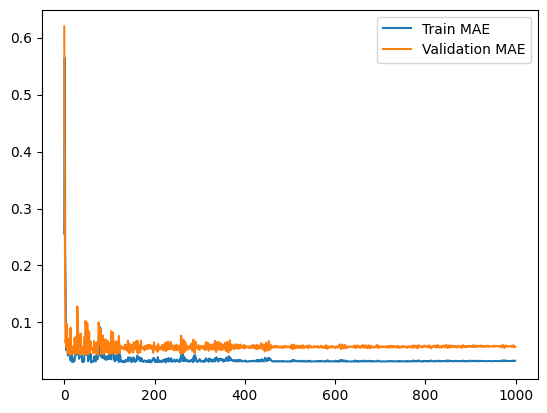

In [20]:
file_name = os.path.join('./checkpoint/log/model_0-4_layer-80_80_80_80_nodes.acc.loss')
with open(file_name, 'r') as f:
    comment = f.readline().split()
    loss_data = np.loadtxt(f)

epoch = loss_data[:,0]
train_mae = loss_data[:,1]
val_mae = loss_data[:,2]

plt.plot(epoch, train_mae, label='Train MAE')
plt.plot(epoch, val_mae, label='Validation MAE')
plt.legend()
plt.show()

### 5. Predict the dataset with the well-trained model

In [5]:
from elasticnet import load_and_pred
load_and_pred('train.json', 'x_data.txt', write_pred_log=True, drop_cols=None)

1/1 [==============================] - 0s 53ms/step


(array([[0.18706536],
        [0.1744112 ],
        [0.17446049],
        [0.18731898],
        [0.17451893],
        [0.1807783 ],
        [0.18076997],
        [0.1872704 ],
        [0.18078867],
        [0.17447841],
        [0.18101771],
        [0.1745325 ],
        [0.18098012],
        [0.17451489],
        [0.18096507],
        [0.17875955],
        [0.18306617],
        [0.17878257],
        [0.17874199],
        [0.17446312],
        [0.17871656],
        [0.1830447 ],
        [0.1787648 ],
        [0.18303876],
        [0.17874175],
        [0.18087225],
        [0.17759976],
        [0.18085517],
        [0.18087262],
        [0.1777301 ],
        [0.17967394]], dtype=float32),
 array([[0.18050672, 0.19238468, 0.20276557, 0.18509553, 0.17457433],
        [0.17538841, 0.169178  , 0.1796616 , 0.17352141, 0.17430665],
        [0.17540085, 0.16929363, 0.17974748, 0.17355378, 0.1743067 ],
        [0.18055615, 0.19293578, 0.20326677, 0.18526153, 0.17457461],
        [0.17541204, 

### 6. Draw *True* vs *Predict* plot

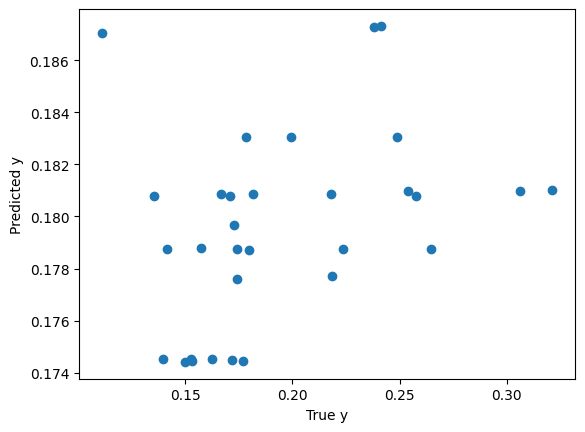

In [21]:
true_y = np.loadtxt('y_data.txt')
pred_y = np.loadtxt(os.path.join('checkpoint', 'pred', 'prediction_mean.txt'))
plt.scatter(true_y, pred_y)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.show()

### 7. Optimize model performance.
**You need to optimize parameters in `train.json`**

Generally, `Nodes_per_layer` is important.